![Movie popcorn on red background](redpopcorn.jpg)

# Investigating Netflix movies

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

## Netflix movies

First, we will import the csv file as a *pandas dataframe* and then we will filter out TV Shows to only keep the movies.

In [2]:
netflix_df = pd.read_csv('netflix_data.csv')
print(netflix_df)

     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

In [3]:
# Filtering out TV Shows
netflix_subset = netflix_df.loc[netflix_df['type'] != 'TV Show']
print(netflix_subset)

     show_id   type                                    title  \
1         s2  Movie                                     7:19   
2         s3  Movie                                    23:59   
3         s4  Movie                                        9   
4         s5  Movie                                       21   
6         s7  Movie                                      122   
...      ...    ...                                      ...   
7781   s7782  Movie                                     Zoom   
7782   s7783  Movie                                     Zozo   
7783   s7784  Movie                                   Zubaan   
7784   s7785  Movie                        Zulu Man in Japan   
7786   s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ... 

In [4]:
# Keeping only the title, country, genre, release year and duration
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]
print(netflix_movies)

                                        title         country          genre  \
1                                        7:19          Mexico         Dramas   
2                                       23:59       Singapore  Horror Movies   
3                                           9   United States         Action   
4                                          21   United States         Dramas   
6                                         122           Egypt  Horror Movies   
...                                       ...             ...            ...   
7781                                     Zoom   United States       Children   
7782                                     Zozo          Sweden         Dramas   
7783                                   Zubaan           India         Dramas   
7784                        Zulu Man in Japan             NaN  Documentaries   
7786  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS  United Kingdom  Documentaries   

      release_year  duration  
1       

## Short movies

In [5]:
# Filtering out movies longer than 59 minutes
short_movies = netflix_movies.loc[netflix_movies['duration'] < 60]
print(short_movies)

                                                  title        country  \
35                                            #Rucker50  United States   
55                  100 Things to do Before High School  United States   
67    13TH: A Conversation with Oprah Winfrey & Ava ...            NaN   
101                                   3 Seconds Divorce         Canada   
146                                      A 3 Minute Hug         Mexico   
...                                                 ...            ...   
7679                    WWII: Report from the Aleutians  United States   
7692  Ya no estoy aquí: Una conversación entre Guill...            NaN   
7718                     Yoo Byung Jae: Discomfort Zone    South Korea   
7771                                               Zion  United States   
7784                                  Zulu Man in Japan            NaN   

              genre  release_year  duration  
35    Documentaries          2016        56  
55    Uncategorized

From the above data, we can observe that short movies are mostly concentrated in 3 genres : Documentaries, Children and Stand-Up. Ignoring the Uncategorized category, other genres all have less than 20 short movies.

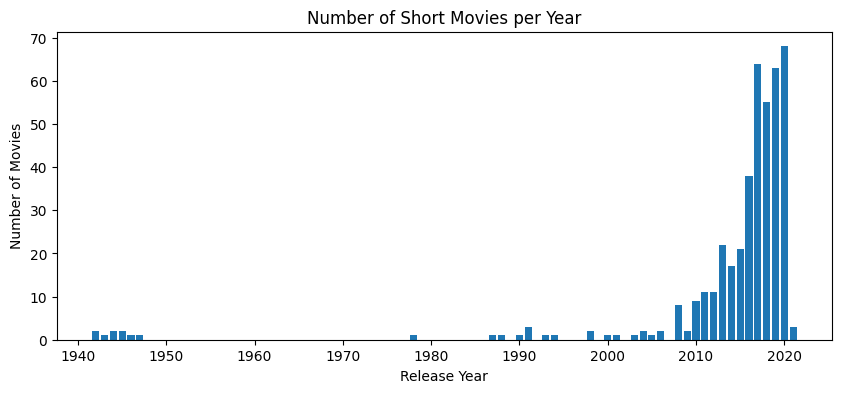

In [7]:
# Counting the number of short movies per genre
year_counts = short_movies['release_year'].value_counts()

# Creating the bar plot using plt.bar()
plt.figure(figsize=(10, 4))
plt.bar(year_counts.index, year_counts.values)
plt.title('Number of Short Movies per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

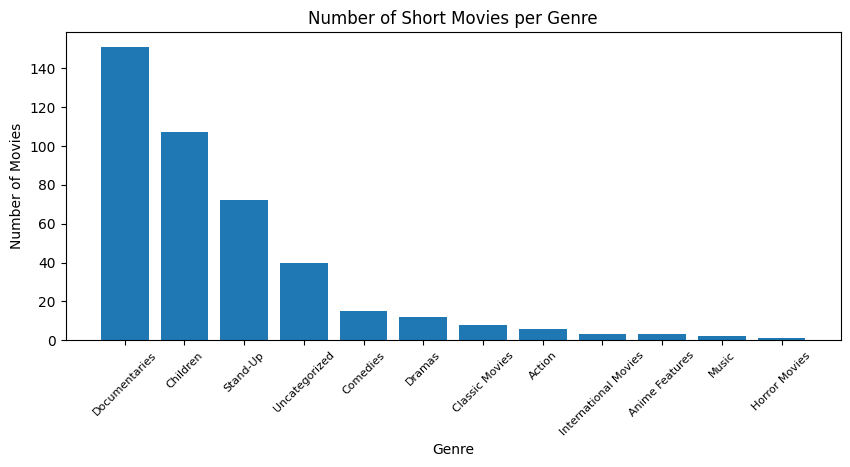

In [6]:
# Counting the number of short movies per genre
genre_counts = short_movies['genre'].value_counts()

# Creating the bar plot using plt.bar()
plt.figure(figsize=(10, 4))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Number of Short Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, size=8)
plt.show()

The above plot shows that there a lot more short_movies nowadays (starting from around 2008) than thre used to be. We can observe what seems to be an exponential growth in short movies being released from 2010 to 2020. This may say two things : movies are getting shorter, or more documentaries, stand-ups and children movies are being released than before. Our data set here is only limited to short movies. We cannot say that movies are getting shorter as we can assume that there are just more movies being released on Netflix every year, and that these movies are recent. To conclude on whether or not movies are getting shorter, we must compare the count of short movies proportionally to the count of all movies.

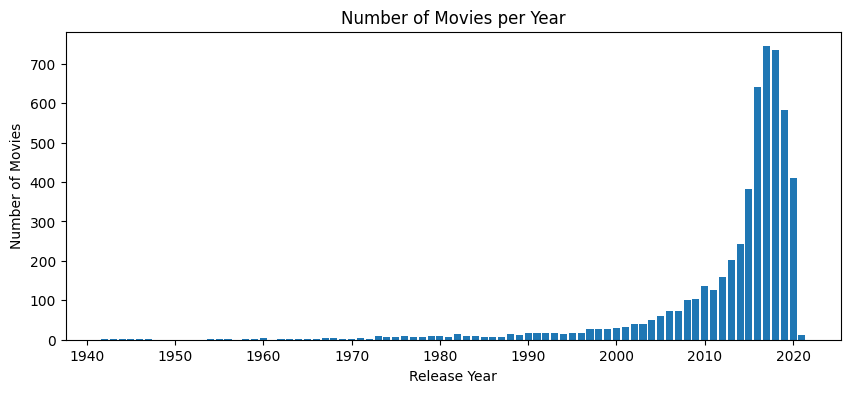

In [8]:
# Counting the number of short movies per genre
year_counts = netflix_movies['release_year'].value_counts()

# Creating the bar plot using plt.bar()
plt.figure(figsize=(10, 4))
plt.bar(year_counts.index, year_counts.values)
plt.title('Number of Movies per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

This interactive plot confirms that Netflix mostly has recent movies. It correlates with the previous short movies plot.

## Release years per genre

### Adding colors to the genres

In [9]:
import matplotlib
colors = []
zorders = []

# Let's iterate through netflix_movies and assign a color to the genres

for genre in list(netflix_movies['genre']):
    if genre == 'Documentaries':
        colors.append('#1833AC')
        zorders.append(2)
    elif genre == 'Children':
        colors.append('#FF2D33')
        zorders.append(2)
    elif genre == 'Stand-Up':
        colors.append('#FFE502')
        zorders.append(2)
    else:
        colors.append('#4C5566')
        zorders.append(1)

### Let's plot the results

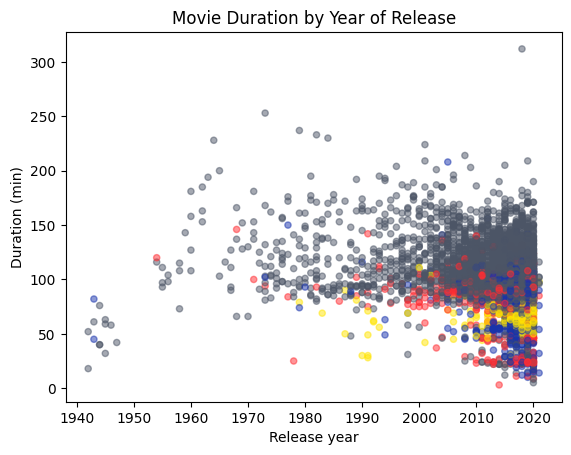

In [10]:

fig, ax = plt.subplots()

# Create a scatter plot for movie duration by release year
# Using the colors list to color the points
ax.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors, alpha=0.5, s=20)

# Setting the labels and title
ax.set_xlabel('Release year')
ax.set_ylabel('Duration (min)')
ax.set_title('Movie Duration by Year of Release')

plt.show()

In [11]:
answer="no"

As we can see above, there are more documentaries, children movies and stand-up shows from 2010 to 2020 on Netflix than ones released before 2010, which can explain why previous plots could hint at movies getting shorter. We can also clearly see that movies as a whole are not getting shorter, there are just more movies than there used to be, at least according to Netflix' catalogue.